<a href="https://colab.research.google.com/github/PrathameshS26/MyProjects/blob/main/WineQualityipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("/content/winequality-red.csv")

In [24]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
dataset.shape

(1599, 12)

In [26]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

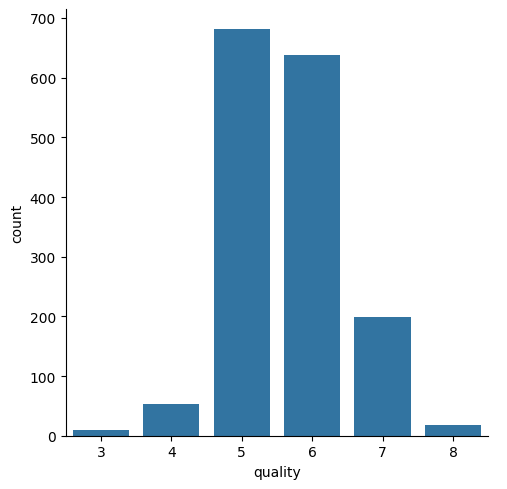

In [28]:
sns.catplot(x="quality", data = dataset, kind="count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

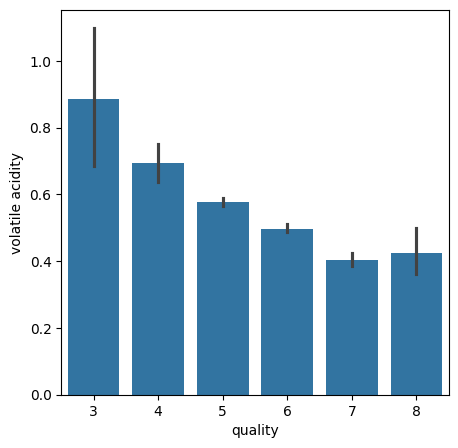

In [29]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile acidity", data=dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

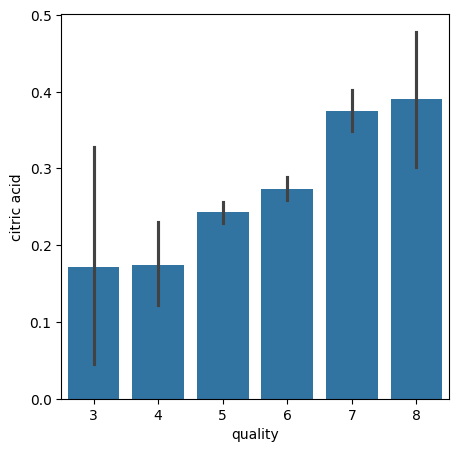

In [30]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="citric acid", data=dataset)

In [31]:
correlation = dataset.corr()

<Axes: >

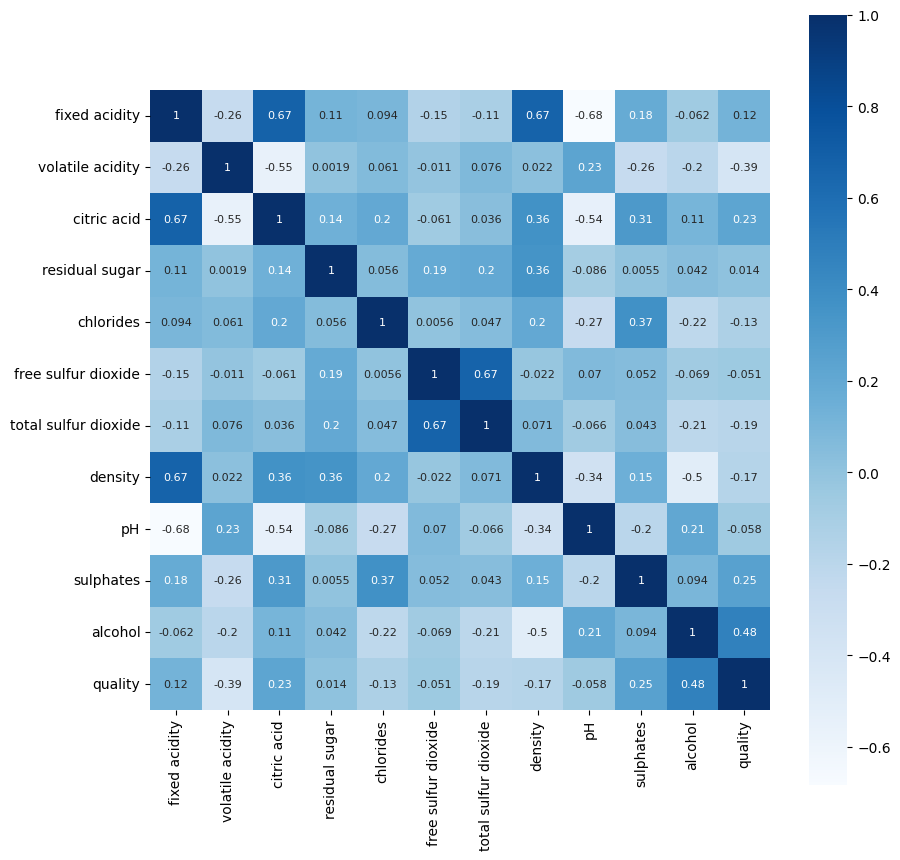

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size":8}, cmap="Blues")

In [33]:
X = dataset.drop(columns="quality", axis = 1)

In [34]:
y = dataset["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [35]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
print("Accuracy Score on Training Data : ", accuracy_score(model.predict(X_train), y_train))

Accuracy Score on Training Data :  1.0


In [23]:
print("Accuracy Score on Testing Data : ", accuracy_score(model.predict(X_test), y_test))

Accuracy Score on Testing Data :  0.95


In [37]:
X_new = (7.8,0.6,0.14,2.4,0.086,3.0,15.0,0.9975,3.42,0.6,10.8)
X_new = np.asarray(X_new)
X_new = X_new.reshape(1,-1)

prediction = model.predict(X_new)
print("This is the prediction : ",prediction)

if prediction == 1:
  print("The Wine is Good Quality")
else:
  print("The Wine is Bad Quality")

This is the prediction :  [0]
The Wine is Bad Quality


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
